In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
sns.set_style('white')
pd.set_option('display.max_columns', 50)
pd.set_option('precision', 5)

from sklearn import preprocessing
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVR
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Background Information, Importing DataFrame, Data Cleaning, Exploration and Visualization

This dataset is from kaggle https://www.kaggle.com/noahgift/social-power-nba. The complete dataset contains NBA player's on-court performance statistics for the 2016-2017 regular season, their salary for the season, Twitter engagement, and Wikipedia traffic data.

## Question

With this dataset I want to explore what factors contribute to a player's salary.

In [2]:
# Import players df
players_df = pd.read_csv(r'C:\Users\brand\Desktop\Thinkful\social-power-nba\nba_2017_players_with_salary_wiki_twitter.csv')
players_df.head(10)

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,0.347,5.1,9.6,0.530,0.525,9.2,10.9,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,0.299,9.7,18.6,0.524,0.518,6.9,8.6,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,0.361,7.2,14.8,0.483,0.498,7.2,9.3,0.772,2.1,8.9,11.0,4.6,1.4,1.3,3.7,3.9,27.0,NO/SAC,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,0.370,6.0,12.1,0.492,0.516,6.5,7.3,0.895,0.6,4.3,4.9,5.9,0.9,0.3,2.6,2.0,27.0,POR,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0
5,5,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,0.363,8.3,13.5,0.611,0.594,4.8,7.2,0.674,1.3,7.3,8.6,8.7,1.2,0.6,4.1,1.8,26.4,CLE,74,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,30.96,14704.0,5533.5,1501.5
6,6,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,5.2,0.380,6.6,12.5,0.529,0.541,6.3,7.2,0.880,1.1,4.7,5.8,3.5,1.8,0.7,2.1,1.6,25.5,SA,74,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54,17.64,2446.5,2701.5,716.5
7,7,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,10.0,0.411,4.4,8.3,0.537,0.580,4.1,4.6,0.898,0.8,3.7,4.5,6.6,1.8,0.2,3.0,2.3,25.3,GS,79,33.4,7.27,0.14,7.41,18.80,15.1,105.08,65,12.11,17570.5,12278.0,2893.0
8,8,11,Kyrie Irving,PG,24,35.1,9.3,19.7,0.473,2.5,6.1,0.401,6.9,13.6,0.505,0.535,4.1,4.6,0.905,0.7,2.5,3.2,5.8,1.2,0.3,2.5,2.2,25.2,CLE,72,35.1,4.35,-2.30,2.05,8.28,13.5,99.12,47,17.64,4796.0,1541.0,695.0
9,9,12,Kevin Durant,SF,28,33.4,8.9,16.5,0.537,1.9,5.0,0.375,7.0,11.5,0.608,0.594,5.4,6.2,0.875,0.6,7.6,8.3,4.8,1.1,1.6,2.2,1.9,25.1,GS,62,33.4,4.41,1.33,5.74,12.24,18.6,103.71,51,26.50,6288.5,1425.5,366.0


In [3]:
players_df.columns

Index(['Unnamed: 0', 'Rk', 'PLAYER', 'POSITION', 'AGE', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS',
       'TEAM', 'GP', 'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS_RPM', 'PIE', 'PACE',
       'W', 'SALARY_MILLIONS', 'PAGEVIEWS', 'TWITTER_FAVORITE_COUNT',
       'TWITTER_RETWEET_COUNT'],
      dtype='object')

Each column of this dataframe represents a statistic for a particular player for the 2016-2017 NBA regular season.

- Unnamed: 0: (to be removed)
- Rk: Rank (to be removed)
- PLAYER: Player name
- POSITION: Player position
- AGE: Player age
- MP: Minutes played (average per game)
- FG: Field goals (shots) made
- FGA: Field goals (shots) attempted
- FG%: Field goal (shots) percentage
- 3P: 3-pointers made
- 3PA: 3-pointers attempted
- 3P%: 3-point percentage
- 2P: 2-pointers made
- 2PA: 2-pointers attempted
- 2P%: 2-point percentage
- eFG%: Effective field goal percentage (calculated: (2P + (1.5 * 3P)) / FGA)
- FT: Free throws made
- FTA: Free throws attempted
- FT%: Free throw percentage
- ORB: Offensive rebounds
- DRB: Defensive rebounds
- TRB: Total rebounds
- AST: Assists
- STL: Steals
- BLK: Blocks
- TOV: Turnovers
- PF: Personal fouls
- POINTS: Points per game
- TEAM: Player team
- GP: Games played
- MPG: Minutes played per game (to be removed)
- ORPM (*): Offensive real plus-minus
- DRPM (*): Defensive real plus-minus
- RPM (*): Real plus-minus
- WINS_RPM (*): Wins real plus-minus (an estimate of the number of wins each player has contributed to his team's win total)
- PIE (**): Player impact estimate
- PACE: Pace (number of possessions per 48 minutes for a team or player)
- W: Number of wins for the year
- SALARY_MILLIONS: Player salary for the year
- PAGEVIEWS: Wikipedia pageviews
- TWITTER_FAVORITE_COUNT: Number of tweets favorited
- TWITTER_RETWEET_COUNT: Number of tweets retweeted

(*) RPM is a stat developed by ESPN which is the player's average impact in terms of net point differential per 100 offensive and defensive possesions. It also takes into account teammates, opponents, and additional factors.

(**) PIE is a stat developed by NBA which shows what percentage of game events did a player or team achieve.

In [4]:
# Drop the unwanted columns
# Unnamed and rank don't mean anything. MPG is a duplication of MP.
players_df = players_df.drop(['Unnamed: 0', 'Rk', 'MPG'], axis = 1)

In [5]:
players_df.isna().sum()

PLAYER                    0
POSITION                  0
AGE                       0
MP                        0
FG                        0
FGA                       0
FG%                       0
3P                        0
3PA                       0
3P%                       7
2P                        0
2PA                       0
2P%                       0
eFG%                      0
FT                        0
FTA                       0
FT%                       2
ORB                       0
DRB                       0
TRB                       0
AST                       0
STL                       0
BLK                       0
TOV                       0
PF                        0
POINTS                    0
TEAM                      0
GP                        0
ORPM                      0
DRPM                      0
RPM                       0
WINS_RPM                  0
PIE                       0
PACE                      0
W                         0
SALARY_MILLIONS     

In [6]:
# Looking at where the null values are
players_df[players_df.isna().any(axis=1)]

,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,TEAM,GP,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
128,Tyson Chandler,C,34,27.6,3.3,4.9,0.671,0.0,0.0,NaN,3.3,4.9,0.671,0.671,1.9,2.6,0.734,3.3,8.2,11.5,0.6,0.7,0.5,1.4,2.7,8.4,PHX,47,-1.06,2.20,1.14,3.55,13.1,101.88,15,12.42,832.0,29.0,9.0
146,David Lee,PF,33,18.7,3.1,5.3,0.590,0.0,0.0,NaN,3.1,5.3,0.590,0.590,1.0,1.4,0.708,1.9,3.7,5.6,1.6,0.4,0.5,1.0,1.6,7.3,SA,79,-0.38,1.50,1.12,3.98,12.6,98.36,58,1.55,42.0,56.5,35.0
175,Ian Mahinmi,C,30,17.9,2.1,3.6,0.586,0.0,0.0,NaN,2.1,3.6,0.586,0.586,1.4,2.4,0.573,1.5,3.3,4.8,0.6,1.1,0.8,1.1,2.9,5.6,WSH,31,-2.22,3.11,0.89,1.44,8.2,98.90,19,15.94,162.5,10.0,5.0
204,Anthony Brown,SF,24,14.5,1.6,4.5,0.360,0.6,2.5,0.259,1.0,2.1,0.478,0.430,0.0,0.0,NaN,0.7,2.3,3.0,0.7,0.5,0.1,0.5,1.4,3.9,NO/ORL,11,-1.42,-0.34,-1.76,0.08,5.8,94.67,3,0.06,11.0,3.0,3.0
213,Dragan Bender,PF,19,13.3,1.3,3.7,0.354,0.7,2.3,0.277,0.7,1.4,0.483,0.441,0.1,0.3,0.364,0.5,1.9,2.4,0.5,0.2,0.5,0.7,1.7,3.4,PHX,43,-3.20,-0.68,-3.88,-0.28,3.3,100.06,13,4.28,495.0,NaN,NaN
222,Omer Asik,C,30,15.5,1.0,2.1,0.477,0.0,0.0,NaN,1.0,2.1,0.477,0.477,0.7,1.3,0.590,1.5,3.7,5.3,0.5,0.2,0.3,0.5,1.6,2.7,NO,31,-2.97,1.94,-1.03,0.65,7.3,99.64,12,9.90,8.0,NaN,NaN
226,Miles Plumlee,C,28,10.8,1.0,2.0,0.478,0.0,0.0,NaN,1.0,2.0,0.478,0.478,0.6,0.9,0.641,0.8,1.3,2.1,0.5,0.4,0.3,0.7,1.6,2.5,MIL/CHA,45,-2.79,0.52,-2.27,0.25,4.0,95.64,19,12.50,362.0,11.0,3.0
230,Rakeem Christmas,PF,25,7.6,0.7,1.5,0.442,0.0,0.0,NaN,0.7,1.5,0.442,0.442,0.7,1.0,0.724,0.9,1.0,1.9,0.1,0.1,0.2,0.3,1.3,2.0,IND,29,-2.20,0.50,-1.70,0.20,4.9,98.43,14,1.47,185.0,13.0,3.0
233,Cole Aldrich,C,28,8.6,0.7,1.4,0.523,0.0,0.0,NaN,0.7,1.4,0.523,0.523,0.2,0.4,0.682,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,MIN,62,-1.82,1.83,0.01,1.04,7.6,97.42,23,7.64,220.5,22.0,9.0
235,Bruno Caboclo,SF,21,4.4,0.7,1.8,0.375,0.2,0.7,0.333,0.4,1.1,0.400,0.438,0.0,0.0,NaN,0.6,0.6,1.1,0.4,0.2,0.1,0.2,0.4,1.6,TOR,9,-1.76,0.11,-1.65,0.04,9.4,95.38,8,1.59,270.5,11.0,8.0


There are seven players that have null values for their 3P% (3-point percentage). This is because they did not attempt any 3-pointers during the season. There are two players with null values for their FT% (free throw percentage) because they did not attempt any free throws. There are three players that do not have any twitter engagements. Rather than dropping these players from the dataframe altogether, it is fair to just fill the null values with 0 as none of the values exist anyway.

In [7]:
# Fill null values with 0
players_df = players_df.fillna(0)
players_df.isna().sum()

PLAYER                    0
POSITION                  0
AGE                       0
MP                        0
FG                        0
FGA                       0
FG%                       0
3P                        0
3PA                       0
3P%                       0
2P                        0
2PA                       0
2P%                       0
eFG%                      0
FT                        0
FTA                       0
FT%                       0
ORB                       0
DRB                       0
TRB                       0
AST                       0
STL                       0
BLK                       0
TOV                       0
PF                        0
POINTS                    0
TEAM                      0
GP                        0
ORPM                      0
DRPM                      0
RPM                       0
WINS_RPM                  0
PIE                       0
PACE                      0
W                         0
SALARY_MILLIONS     

In [8]:
players_df.shape

(239, 39)

In [9]:
players_df['SALARY_MILLIONS'].describe()

count    239.00000
mean       8.09184
std        6.95558
min        0.06000
25%        2.58000
50%        5.37000
75%       12.09500
max       30.96000
Name: SALARY_MILLIONS, dtype: float64

Text(0.5, 0, 'Salary (Millions)')

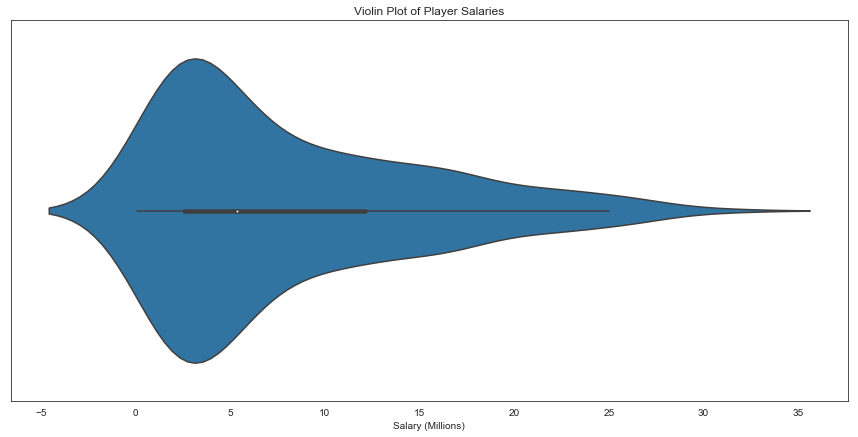

In [10]:
plt.figure(figsize=(15, 7))
ax = sns.violinplot(x=players_df['SALARY_MILLIONS'])
plt.title('Violin Plot of Player Salaries')
plt.xlabel('Salary (Millions)')

Text(0.5, 0, 'Salary (Millions)')

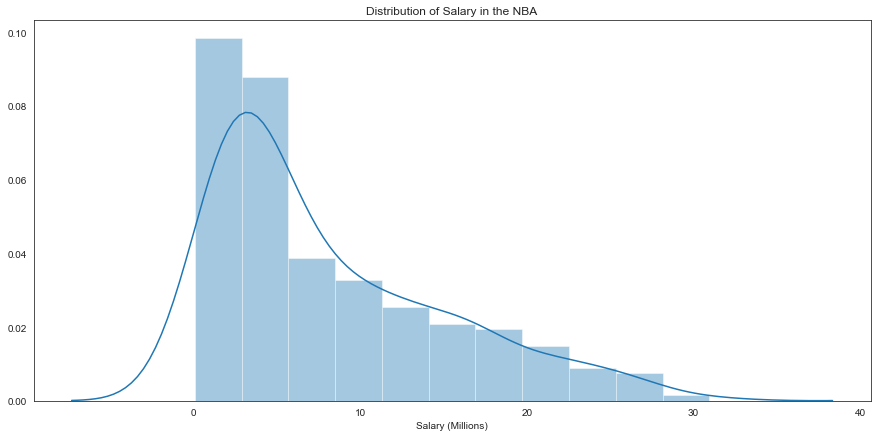

In [11]:
plt.figure(figsize=(15, 7))
sns.distplot(players_df['SALARY_MILLIONS'])
plt.title('Distribution of Salary in the NBA')
plt.xlabel('Salary (Millions)')

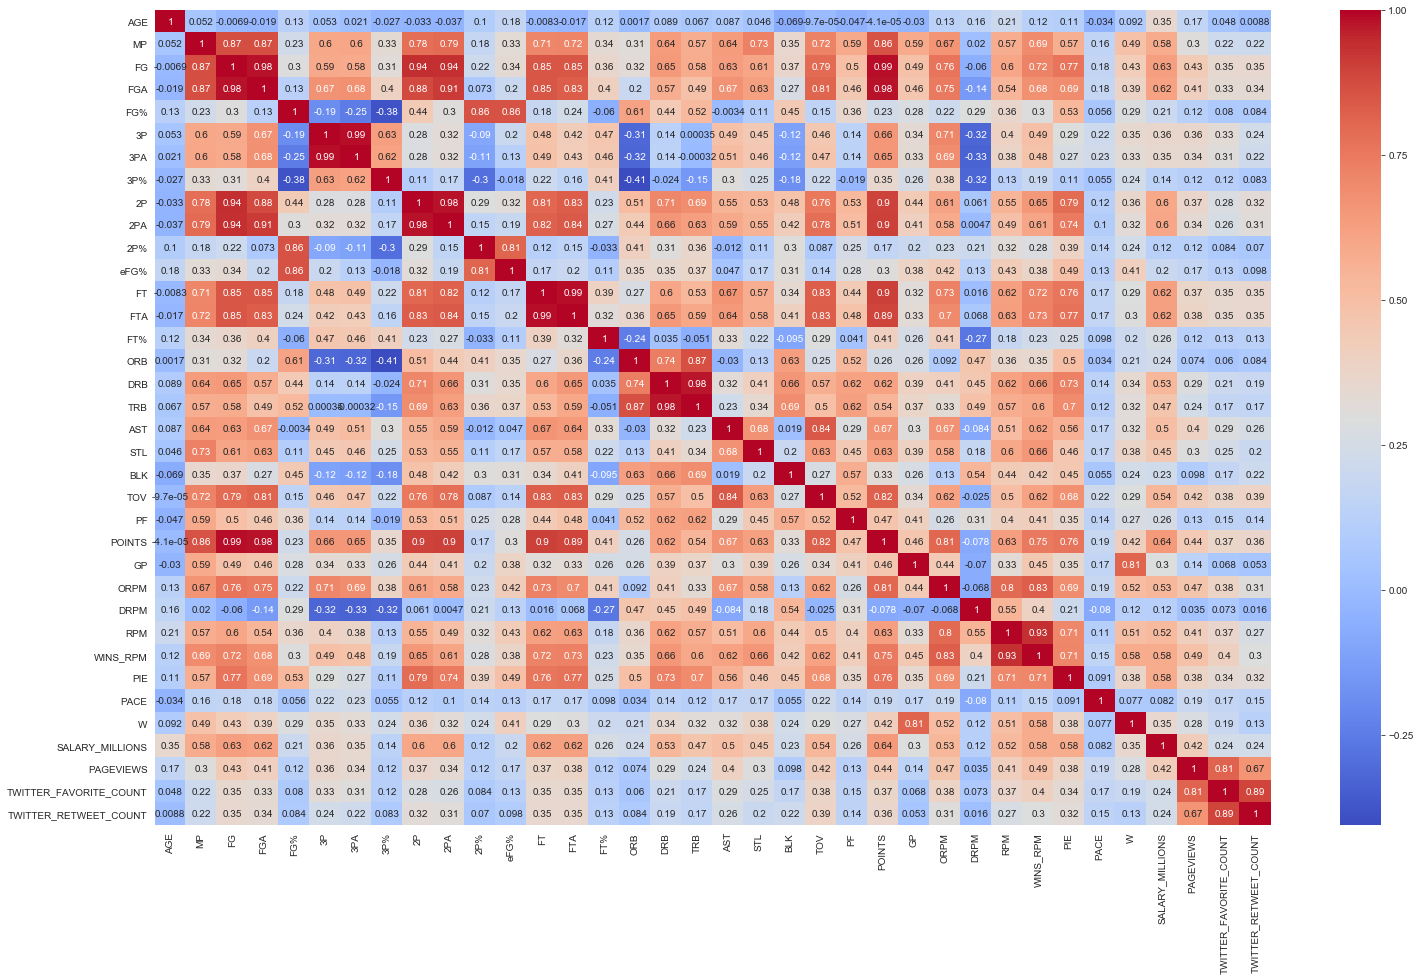

In [12]:
plt.figure(figsize=(25, 15))
sns.heatmap(players_df.corr(), cmap='coolwarm', annot=True)

Text(9.550000000000008, 0.5, 'Points')

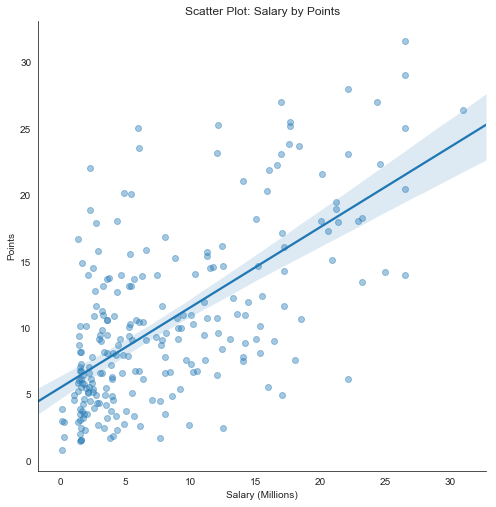

In [13]:
sns.lmplot(x='SALARY_MILLIONS', y='POINTS', data=players_df, scatter_kws={'alpha':0.4}, height=7)
plt.title('Scatter Plot: Salary by Points')
plt.xlabel('Salary (Millions)')
plt.ylabel('Points')

# Modeling

## First Attempt: Run models on the entire dataframe

In [14]:
# Player data preparation for modeling
players_X = players_df.drop(['PLAYER', 'POSITION', 'TEAM'], axis = 1)
players_Y = players_df['SALARY_MILLIONS']

In [15]:
lab_enc = preprocessing.LabelEncoder()
trans_players_Y = lab_enc.fit_transform(players_Y)

In [16]:
# Linear Regression
players_linregr1 = LinearRegression()
players_linregr1.fit(players_X, trans_players_Y)
print("Linear Regression Accuracy Score:", players_linregr1.score(players_X, trans_players_Y))

# Ridge Regression
players_rid_regr1 = linear_model.Ridge()
players_rid_regr1.fit(players_X, trans_players_Y)
print("Ridge Regression Accuracy Score:", players_rid_regr1.score(players_X, trans_players_Y))

# Lasso Regression
players_lass_regr1 = linear_model.Lasso()
players_lass_regr1.fit(players_X, trans_players_Y)
print("Lasso Regression Accuracy Score:", players_lass_regr1.score(players_X, trans_players_Y))

# Support Vector Regression
players_SVR1 = SVR()
players_SVR1.fit(players_X, trans_players_Y)
print("SVR Accuracy Score:", players_SVR1.score(players_X, trans_players_Y))

# KNN
players_knn1 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
players_knn1.fit(players_X, trans_players_Y)
print("KNN Accuracy Score:", players_knn1.score(players_X, trans_players_Y))

Linear Regression Accuracy Score: 0.9001982900432873
Ridge Regression Accuracy Score: 0.8978023742054756
Lasso Regression Accuracy Score: 0.8916835315608853
SVR Accuracy Score: 0.028953035478601286
KNN Accuracy Score: 1.0


c:\users\brand\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Try the models again on training data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(players_X, trans_players_Y, test_size=0.3, random_state=50)

In [18]:
# Linear Regression
players_linregr2 = LinearRegression()
players_linregr2.fit(X_train, y_train)
print("Linear Regression Accuracy Score:", players_linregr2.score(X_train, y_train))

# Ridge Regression
players_rid_regr2 = linear_model.Ridge()
players_rid_regr2.fit(X_train, y_train)
print("Ridge Regression Accuracy Score:", players_rid_regr2.score(X_train, y_train))

# Lasso Regression
players_lass_regr2 = linear_model.Lasso()
players_lass_regr2.fit(X_train, y_train)
print("Lasso Regression Accuracy Score:", players_lass_regr2.score(X_train, y_train))

# Support Vector Regression
players_SVR2 = SVR()
players_SVR2.fit(X_train, y_train)
print("SVR Accuracy Score:", players_SVR2.score(X_train, y_train))

# KNN
players_knn2 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
players_knn2.fit(X_train, y_train)
print("KNN Accuracy Score:", players_knn2.score(X_train, y_train))

Linear Regression Accuracy Score: 0.9014461432222982
Ridge Regression Accuracy Score: 0.8965938574571649
Lasso Regression Accuracy Score: 0.8894998278365165
SVR Accuracy Score: 0.027449758673932623
KNN Accuracy Score: 1.0


c:\users\brand\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Analysis

Seems like the models may be overfitting. 

# Adjusting the Models

## Second Attempt: Choosing features

Some of the features are reptitive. For example, the dataframe contains FG, FGA, and FG% which represent field goals made (FG), field goals attempted (FGA), and field goal percentage (FG%). The percentage variable (FG%) actually contains the other two variables (FG and FGA). This also applies to 3P, 3PA, 3P% (3-pointers made, attempted and percentage), 2P, 2PA, 2P% (2-pointers made, attempted and percentage), FT, FTA, FT% (free throws made, free throws attempted, and free throw percentage), ORB, DRB, and TRB (offensive rebounds, defensive rebounds, and total rebouunds). In addition, the varabiles for field goals contain the total count of 3-pointers and 2-pointers (made, attempted and percentage). In the case of shots, I will only be keeping the percentages (3P%, 2P% and FT%), and ignoring field goals altogether. For rebounds, I will ignore the total rebounds. 

In [19]:
# Player data preparation for modeling without reptitive features
players_X2 = players_df.drop(['PLAYER', 'POSITION', 'TEAM', 'FG', 'FGA', 'FG%', '3P', '3PA', 
                              '2P', '2PA', 'FT', 'FTA', 'TRB'], axis = 1)

In [20]:
# Linear Regression
players_linregr3 = LinearRegression()
players_linregr3.fit(players_X2, trans_players_Y)
print("Linear Regression Accuracy Score:", players_linregr3.score(players_X2, trans_players_Y))

# Ridge Regression
players_rid_regr3 = linear_model.Ridge()
players_rid_regr3.fit(players_X2, trans_players_Y)
print("Ridge Regression Accuracy Score:", players_rid_regr3.score(players_X2, trans_players_Y))

# Lasso Regression
players_lass_regr3 = linear_model.Lasso()
players_lass_regr3.fit(players_X2, trans_players_Y)
print("Lasso Regression Accuracy Score:", players_lass_regr3.score(players_X2, trans_players_Y))

# Support Vector Regression
players_SVR3 = SVR()
players_SVR3.fit(players_X2, trans_players_Y)
print("SVR Accuracy Score:", players_SVR3.score(players_X2, trans_players_Y))

# KNN
players_knn3 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
players_knn3.fit(players_X2, trans_players_Y)
print("KNN Accuracy Score:", players_knn3.score(players_X2, trans_players_Y))

Linear Regression Accuracy Score: 0.8953675731839178
Ridge Regression Accuracy Score: 0.8949601456563705
Lasso Regression Accuracy Score: 0.8914381861124165
SVR Accuracy Score: 0.02893141184800263
KNN Accuracy Score: 1.0


c:\users\brand\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Run models with reduced features on training data

In [21]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(players_X2, trans_players_Y, test_size=0.3, random_state=50)

In [22]:
# Linear Regression
players_linregr4 = LinearRegression()
players_linregr4.fit(X_train2, y_train2)
print("Linear Regression Accuracy Score:", players_linregr4.score(X_train2, y_train2))

# Ridge Regression
players_rid_regr4 = linear_model.Ridge()
players_rid_regr4.fit(X_train2, y_train2)
print("Ridge Regression Accuracy Score:", players_rid_regr4.score(X_train2, y_train2))

# Lasso Regression
players_lass_regr4 = linear_model.Lasso()
players_lass_regr4.fit(X_train2, y_train2)
print("Lasso Regression Accuracy Score:", players_lass_regr4.score(X_train2, y_train2))

# Support Vector Regression
players_SVR4 = SVR()
players_SVR4.fit(X_train2, y_train2)
print("SVR Accuracy Score:", players_SVR4.score(X_train2, y_train2))

# KNN
players_knn4 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
players_knn4.fit(X_train2, y_train2)
print("KNN Accuracy Score:", players_knn4.score(X_train2, y_train2))

Linear Regression Accuracy Score: 0.8936659212756449
Ridge Regression Accuracy Score: 0.892908400724996
Lasso Regression Accuracy Score: 0.88879528071658
SVR Accuracy Score: 0.02744722714028602
KNN Accuracy Score: 1.0


c:\users\brand\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Analysis

When running models with a reduced number of features on the whole dataframe, the accuracy scores again did not change much.

## Third Attempt: PCA

Run PCA on the second attempt of reduced amount of features

In [23]:
# Feature selection with PCA
from sklearn.decomposition import PCA

# Keep 10 components
pca = PCA(n_components=10)
X_pca = pca.fit_transform(players_X2)

In [24]:
# Linear Regression
players_linregr5 = LinearRegression()
players_linregr5.fit(X_pca, trans_players_Y)
print("Linear Regression Accuracy Score:", players_linregr5.score(X_pca, trans_players_Y))

# Ridge Regression
players_rid_regr5 = linear_model.Ridge()
players_rid_regr5.fit(X_pca, trans_players_Y)
print("Ridge Regression Accuracy Score:", players_rid_regr5.score(X_pca, trans_players_Y))

# Lasso Regression
players_lass_regr5 = linear_model.Lasso()
players_lass_regr5.fit(X_pca, trans_players_Y)
print("Lasso Regression Accuracy Score:", players_lass_regr5.score(X_pca, trans_players_Y))

# Support Vector Regression
players_SVR5 = SVR()
players_SVR5.fit(X_pca, trans_players_Y)
print("SVR Accuracy Score:", players_SVR5.score(X_pca, trans_players_Y))

# KNN
players_knn5 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
players_knn5.fit(X_pca, trans_players_Y)
print("KNN Accuracy Score:", players_knn5.score(X_pca, trans_players_Y))

Linear Regression Accuracy Score: 0.8870761930329611
Ridge Regression Accuracy Score: 0.8870761769920671
Lasso Regression Accuracy Score: 0.8869703231026018
SVR Accuracy Score: 0.028923324638741033
KNN Accuracy Score: 1.0


c:\users\brand\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## PCA on training data

In [25]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_pca, trans_players_Y, test_size=0.3, random_state=50)

In [26]:
# Linear Regression
players_linregr6 = LinearRegression()
players_linregr6.fit(X_train3, y_train3)
print("Linear Regression Accuracy Score:", players_linregr6.score(X_train3, y_train3))

# Ridge Regression
players_rid_regr6 = linear_model.Ridge()
players_rid_regr6.fit(X_train3, y_train3)
print("Ridge Regression Accuracy Score:", players_rid_regr6.score(X_train3, y_train3))

# Lasso Regression
players_lass_regr6 = linear_model.Lasso()
players_lass_regr6.fit(X_train3, y_train3)
print("Lasso Regression Accuracy Score:", players_lass_regr6.score(X_train3, y_train3))

# Support Vector Regression
players_SVR6 = SVR()
players_SVR6.fit(X_train3, y_train3)
print("SVR Accuracy Score:", players_SVR6.score(X_train3, y_train3))

# KNN
players_knn6 = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
players_knn6.fit(X_train3, y_train3)
print("KNN Accuracy Score:", players_knn6.score(X_train3, y_train3))

Linear Regression Accuracy Score: 0.882235115305264
Ridge Regression Accuracy Score: 0.882235079094194
Lasso Regression Accuracy Score: 0.8821194309533751
SVR Accuracy Score: 0.02745324055934617
KNN Accuracy Score: 1.0


c:\users\brand\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Anaylsis

Using PCA did not change the accuracy scores much as well.

# Linear Regression

I want to see which variables are significant in these models. To do this, I will look back at the second attempt of running linear regression on the data and pull out the coefficients and p-values.

In [27]:
lr1 = sm.OLS(trans_players_Y, players_X2.drop(['SALARY_MILLIONS'], axis = 1)).fit()

In [28]:
lr_dr = pd.DataFrame()
lr_dr["Coefficients"],lr_dr["P-Values"] = [lr1.params, lr1.pvalues]
lr_dr

,Coefficients,P-Values
AGE,5.01364,1.20088e-11
MP,-1.38886,3.19260e-01
3P%,-32.48583,2.99796e-01
2P%,-56.09916,4.17129e-01
eFG%,84.34400,4.36069e-01
FT%,21.78574,4.12845e-01
ORB,8.59516,2.76485e-01
DRB,9.39552,3.47463e-02
AST,10.97233,3.61890e-02
STL,20.53206,9.59184e-02


### Anaylsis

The significant variables in this model are AGE, DRB, AST, TOV, POINTS, and PACE. 

# Linear Regression on Subsets of Data

## Advanced Metrics

ESPN and NBA.com have their own statistics that measure a player's impact. RPM (real plus-minus) statistics were developed by ESPN and PIE (player impact estimate) is from NBA.com.

In [29]:
X2 = players_X2[['ORPM', 'DRPM', 'RPM', 'WINS_RPM', 'PIE']]

l2 = LinearRegression()
l2.fit(X2, trans_players_Y)
print("Accuracy Score:", l2.score(X2, trans_players_Y))

lr2 = sm.OLS(trans_players_Y, X2).fit()

Accuracy Score: 0.29712342000296843


In [30]:
lr_dr2 = pd.DataFrame()
lr_dr2["Coefficients"],lr_dr2["P-Values"] = [lr2.params, lr2.pvalues]
lr_dr2

,Coefficients,P-Values
ORPM,-3.00782,4.60452e-02
DRPM,-3.40599,2.76864e-02
RPM,-6.41381,2.85913e-04
WINS_RPM,9.26838,1.39930e-05
PIE,6.36654,2.30051e-12


### Analysis

When running linear regression on only advanced metrics developed by ESPN and NBA.com, the accuracy score is only .297.

## Scoring

Running linear regression on only shooting percentages and total points.

In [31]:
X3 = players_X2[['3P%', '2P%', 'eFG%', 'FT%', 'POINTS']]

l3 = LinearRegression()
l3.fit(X3, trans_players_Y)
print("Accuracy Score:", l2.score(X3, trans_players_Y))

lr3 = sm.OLS(trans_players_Y, X3).fit()

Accuracy Score: 0.2353769824064691


In [32]:
lr_dr3 = pd.DataFrame()
lr_dr3["Coefficients"],lr_dr3["P-Values"] = [lr3.params, lr3.pvalues]
lr_dr3

,Coefficients,P-Values
3P%,-52.95024,8.36560e-02
2P%,-95.36435,2.18432e-01
eFG%,153.98511,7.96624e-02
FT%,36.14104,1.37753e-01
POINTS,5.27442,4.60636e-19


### Analysis

Running linear regression on scoring statistics yields a .235 accuracy score.

# Conclusion

I ran regression models on this dataframe to predict the factors of NBA player salary. The first attempt was running regression models on the whole dataframe. Next, I removed features that were reptitive and again ran regression models. Finally, I ran PCA on the reduced dataframe and ran regression models again. The accuracy scores for all three attempts were similar. The accuracy scores for linear, ridge, and lasso regression all hovered around 89%. These scores were high which may indicate that it is overfit. The accuracy scores for SVR were the worst by far at around 3%. The KNN accuracy score was always overfit and hit 100%.

Next I went further into the second attempt at linear regression. The most significant variables were AGE, total defensive rebounds (DRB), assists (AST), turnovers (TOV), POINTS, and PACE. 

I then handpicked a few subsets of data to run linear regression models. First I wanted to look at the advanced metrics created by ESPN and NBA.com. The accuracy score for that model was .297. The other subset of data was looking at scoring statistics, which led to an accuracy score of .235. Neither of these models were good at predicting factors of salary.

There are some limitations of the dataframe which may contribute to the overfitting. This dataset only has player data for the 2016-2017 NBA season. It would be better to have data for multiple seasons.